# Execution Time Analysis for Logistic Regression Training
This notebook analyzes the execution times from `07_spark_logistic_regression_food_inspections` to provide comparisons between:

1. A from-scratch Python implementation which uses looping to compute gradients on individual samples
2. A from-scratch Spark implementation which leverages distributed map and reduce operations to compute gradients on individual samples
3. The Spark MLlib implementation of Logistic Regression

**Notes:**

1. Logistic Regression Algorithm for Spark RDD from M. Zaharia, M. Chowdhury, T. Das, A. Dave, J. Ma, M. McCauley, M. J. Franklin, S. Shenker, and I. Stoica. Resilient distributed datasets: A fault-tolerant abstraction for in-memory cluster computing. In Proceedings of NSDI, pages 15–28, 2012.
2. Raw Python Version based on https://github.com/jstremme/l2-regularized-logistic-regression but without regularization and vectorization of matrix operations.  Instead `py_lr_grad_descent` computes the gradient on each sample sequentially, unlike Spark which will compute the gradient on each sample but in parallel.
3. Spark MLlib: https://spark.apache.org/docs/latest/ml-guide.html.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Record Fit Times by Instance

In [2]:
fit_times_df = pd.DataFrame(
    {'instances': [2, 2, 2, 2, 2, 4, 4, 4, 4, 4],
     'scratch_python_fit_time_seconds': [60*1 + 30, 60*1 + 28, 60*1 + 24, 60*1 + 32, 60*1 + 27, 60*1 + 44, 60*1 + 52, 60*1 + 41, 60*1 + 49, 60*1 + 54],
     'scratch_spark_fit_time_seconds': [60*1 + 49, 60*1 + 52, 60*1 + 47, 60*1 + 49, 60*1 + 51, 48, 45, 42, 42, 52],
     'mllib_spark_fit_time_seconds': [24, 23, 22, 23, 21, 19, 18, 18, 17, 19]
    })

### Create Plotting Functions

In [3]:
def mean_r(x):
    return round(np.mean(x), 3)

In [4]:
def min_r(x):
    return round(min(x), 3)

In [5]:
def max_r(x):
    return round(max(x), 3)

In [6]:
def plot_execution_time(df, algos, title, suptitle):
    
    plt.figure(figsize=(8,8))
    xpos=np.arange(len(algos))
    plt.barh(xpos-0.2, df['Min'], height=0.2, label='Min', color='yellow')
    plt.barh(xpos, df['Mean'], height=0.2, label='Mean', color='orange')
    plt.barh(xpos+0.2, df['Max'], height=0.2, label='Max', color='red')

    plt.title(title)
    plt.suptitle(suptitle)
    plt.yticks(xpos, algos)
    plt.xlabel('Execution Time (Seconds)')
    plt.ylabel('Algorithm and Number of Instances')
    plt.legend(loc='best')
    
    plt.show()

### Split Data by Number of Instances

In [7]:
two_instance_df = fit_times_df[fit_times_df['instances'] == 2]
four_instance_df = fit_times_df[fit_times_df['instances'] == 4]

### Compute Summary Statistics

In [8]:
algos = ['Scratch Sequential Python - 2 Instances', 'Scratch Spark - 2 Instances', 'MLlib Spark - 2 Instances',
         'Scratch Sequential Python - 4 Instances', 'Scratch Spark - 4 Instances', 'MLlib Spark - 4 Instances']

In [9]:
all_times = [two_instance_df['scratch_python_fit_time_seconds'].tolist(),
             two_instance_df['scratch_spark_fit_time_seconds'].tolist(),
             two_instance_df['mllib_spark_fit_time_seconds'].tolist(),
             four_instance_df['scratch_python_fit_time_seconds'].tolist(),
             four_instance_df['scratch_spark_fit_time_seconds'].tolist(),
             four_instance_df['mllib_spark_fit_time_seconds'].tolist()]

In [10]:
mean_times = list(map(mean_r, all_times))
min_times = list(map(min_r, all_times))
max_times = list(map(max_r, all_times))

In [11]:
summary_df = pd.DataFrame(
        {'Mean': mean_times,
         'Min': min_times,
         'Max': max_times,
        })

### Plot Execution Times
Note the from-scratch implementations run with batch size = 1 as in the 2012 RDD paper.

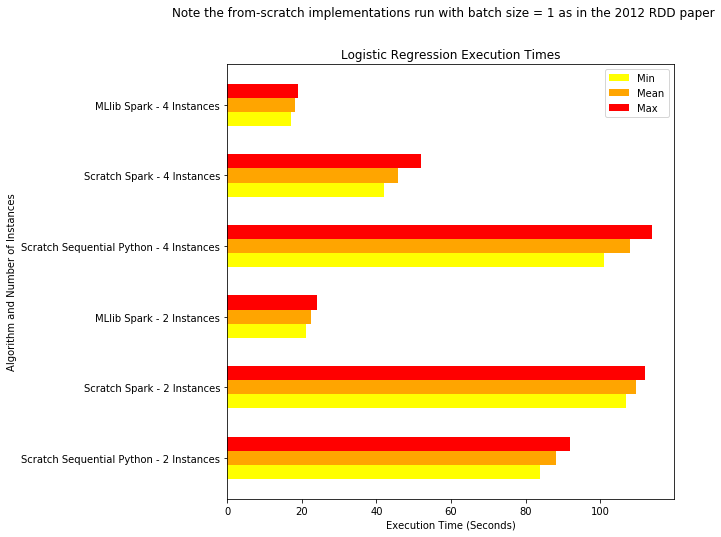

In [12]:
plot_execution_time(summary_df, algos,
                    title='Logistic Regression Execution Times',
                    suptitle='Note the from-scratch implementations run with batch size = 1 as in the 2012 RDD paper')